In [1]:
from wick import wick as wick_class
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


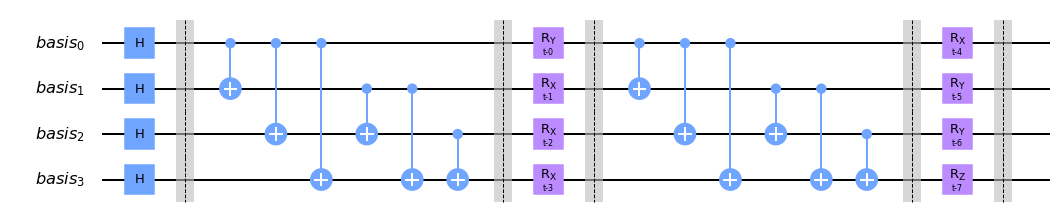

In [2]:
wick=wick_class(4,seed=3,depth=2)
wick.circuit.draw('mpl')

In [50]:
n=5
wick=wick_class(n,seed=3,depth=3)
wick.get_initial_angles()

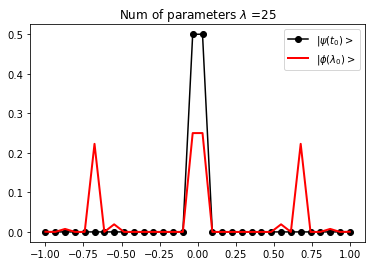

In [11]:
state=wick.get_final_state(wick.angles[0])

x=np.linspace(-1,1,2**n)
fig,ax=plt.subplots()
ax.plot(x,wick.initial*wick.initial.conj(),c="k",label="$|\psi(t_0)>$",marker="o")
ax.plot(x,state*state.conj(),c="r",label="$|\phi(\lambda_0)>$",lw=2)
ax.set_title(f"Num of parameters $\lambda$ ={wick.num_parameters}")
ax.legend()
plt.show()

In [18]:
n=5
closeness=[]
for depth in tqdm([1,2,3,4,5,6,7,8]):
    wick=wick_class(n,seed=5,depth=depth)
    wick.get_initial_angles(maxiter=2000)
    closeness.append(wick.initial_closeness)

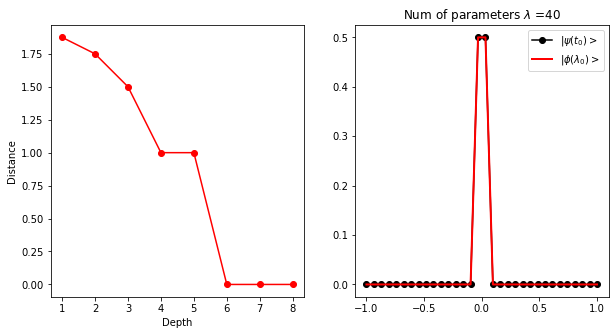

In [23]:
fig,ax1=plt.subplots(1,2,figsize=(10,5))
ax=ax1[0]
depth=[1,2,3,4,5,6,7,8]
ax.plot(depth,closeness,c="r",marker="o")
ax.set_ylabel("Distance")
ax.set_xlabel("Depth")

ax=ax1[1]
state=wick.get_final_state(wick.angles[0])

x=np.linspace(-1,1,2**n)
ax.plot(x,wick.initial*wick.initial.conj(),c="k",label="$|\psi(t_0)>$",marker="o")
ax.plot(x,state*state.conj(),c="r",label="$|\phi(\lambda_0)>$",lw=2)
ax.set_title(f"Num of parameters $\lambda$ ={wick.num_parameters}")
ax.legend()
plt.show()